In [1]:
import qiskit.tools.jupyter
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

#%qiskit_version_table



In [2]:
simulator = AerSimulator()


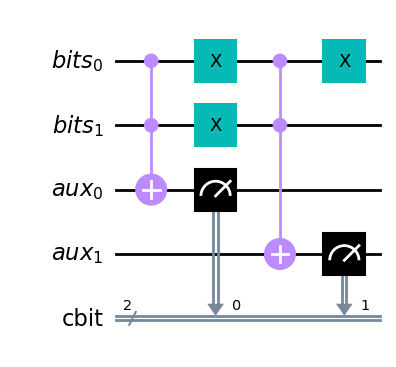

In [22]:

def bit_compare(input_cbits:str = "00"):
    qr = QuantumRegister(2, "bits")
    aux = QuantumRegister(2, "aux")
    cr = ClassicalRegister(2, "cbit")
    
    qc = QuantumCircuit(qr, aux, cr)
    #qc.initialize(input_cbits, qr)
    # set qbit 0 and 1 to 1
    #if input_cbits[0]=='1':
    #if input_cbits[1]=='1':
    #    qc.x(qr[0])
    #    qc.x(qr[1])
    #
    qc.mcx(qr, aux[0])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr, aux[1])
    qc.x(qr[0])

    qc.measure([aux[0],aux[1]], [cr[0],cr[1]])
    
    return qc

qc_bc = bit_compare("00")

# measure on classical register , if true, will add classical register automatically
#qc.measure_all(add_bits=False)
# measure qubit of a registre to a cbit in circruit

qc_bc.draw()


In [23]:
def simulate(input_cbits="00"):
    qc_bc = bit_compare(input_cbits)
    job = execute(qc_bc,simulator,shots = 1000)
    result = job.result()
    counts = result.get_counts(qc_bc)
    return counts

In [24]:
# do unit test logic
# aux0 == 1 if b0 > b1
# aux1 == 1 if b1 > b0
# aux1 and aux0 == 0 if b1==b0
simulate("00")

{'10': 1000}


Total count for 0 and 1 are: {'10': 1000}


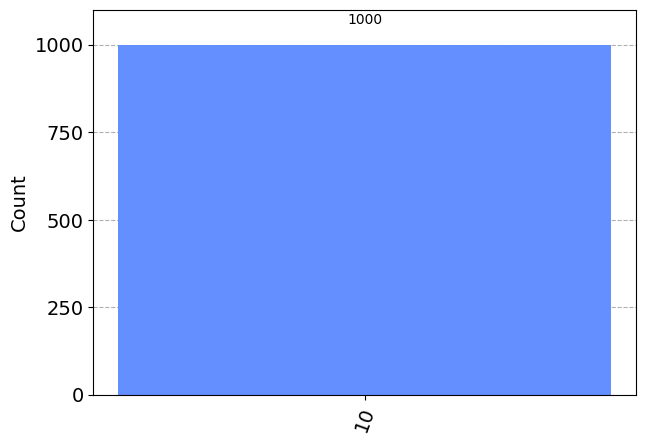

In [25]:
job = execute(qc_bc,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(qc_bc)
print("\nTotal count for 0 and 1 are:",counts)
plot_histogram(counts)